Credits EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from ast import literal_eval

In [2]:
credits = pd.read_csv('../data/original data/credits.csv')

In [3]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [5]:
credits.shape

(45476, 3)

In [6]:
print(credits.isnull().sum())

cast    0
crew    0
id      0
dtype: int64


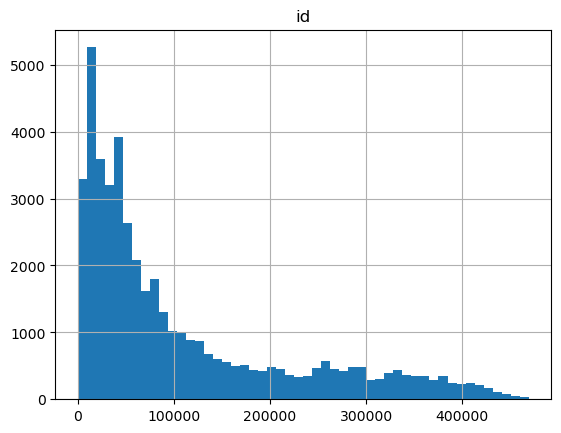

In [7]:
credits.hist(bins=50)
plt.show()

In [8]:
def extract_text_values(text, key="name"):
    if pd.isna(text):
        return np.nan
    try:
        items = literal_eval(str(text))

        if isinstance(items, list):
            values = [str(item.get(key, "")) for item in items if isinstance(item, dict) and key in item]
            return values[0] if len(values) == 1 else ", ".join(values)

        if isinstance(items, dict):
            return items.get(key, np.nan)

        return np.nan

    except (ValueError, SyntaxError, TypeError):
        return np.nan

In [9]:
credits['name_crew'] = credits['crew'].apply(lambda x: extract_text_values(x, key="name"))

credits['department_crew'] = credits['crew'].apply(lambda x: extract_text_values(x, key="department"))

credits['gender_crew'] = credits['crew'].apply(lambda x: extract_text_values(x, key="gender"))

credits['job_crew'] = credits['crew'].apply(lambda x: extract_text_values(x, key="job"))

credits['profile_path_crew'] = credits['crew'].apply(lambda x: extract_text_values(x, key="profile"))

credits['id_crew'] = credits['crew'].apply(lambda x: extract_text_values(x, key="id"))

In [10]:
credits['name_cast'] = credits['cast'].apply(lambda x: extract_text_values(x, key="name"))

credits['order_cast'] = credits['cast'].apply(lambda x: extract_text_values(x, key="order"))

credits['gender_cast'] = credits['cast'].apply(lambda x: extract_text_values(x, key="gender"))

credits['credit_id_cast'] = credits['cast'].apply(lambda x: extract_text_values(x, key="credit_id"))

credits['profile_path_cast'] = credits['cast'].apply(lambda x: extract_text_values(x, key="profile"))

credits['id_cast'] = credits['cast'].apply(lambda x: extract_text_values(x, key="id"))

credits['character_cast'] = credits['cast'].apply(lambda x: extract_text_values(x, key="character"))

In [11]:
credits.drop(["cast", "crew"], axis=1, inplace=True)

new csv

In [12]:
credits.to_csv("../data/final data/credits.csv", index=False)